## Q1. Explain GET and POST methods.

Ans :-

GET and POST are two HTTP methods used for different purposes when communicating with a web server. These methods define how data is sent between a client (typically a web browser) and a server.

1. **GET Method:**
   - **Purpose:** The GET method is used to request data from a specified resource.
   - **Data in URL:** Parameters and values are appended to the URL in the form of a query string. For example, in `http://example.com/path?name=value`, the data is included in the URL.
   - **Visibility:** Data is visible in the URL, making it less secure. It is suitable for non-sensitive data.
   - **Caching:** Responses can be cached by the browser, which can improve performance for subsequent requests.
   - **Idempotent:** GET requests are considered idempotent, meaning making the same request multiple times should have the same result.

 Example GET request:

In [ ]:
import requests

url = "http://example.com/path"
params = {'name': 'value'}

response = requests.get(url, params=params)

print(response.text)

2. **POST Method:**
   - **Purpose:** The POST method is used to submit data to be processed to a specified resource.
   - **Data in Request Body:** The data is included in the request body, not in the URL. This makes it suitable for sending large amounts of data and for sensitive information.
   - **Visibility:** Data is not visible in the URL, providing a higher level of security. It is suitable for handling sensitive information like passwords.
   - **Caching:** Responses are typically not cached by the browser.
   - **Not Idempotent:** POST requests are not considered idempotent, meaning making the same request multiple times might have different results.


Example POST request:

In [ ]:
import requests

url = "http://example.com/path"
data = {'name': 'value'}

response = requests.post(url, data=data)

print(response.text)

## Q2. Why is request used in Flask?

Ans :- 

In Flask, the `request` object is used to access incoming request data in a Flask application. It provides a convenient way to retrieve information from the client's request, such as form data, query parameters, cookies, and more. The `request` object is an instance of the `Request` class, which is part of the Werkzeug library used by Flask.

1. **Accessing Form Data:** When a user submits a form on a webpage, the form data is included in the request. The `request.form` attribute allows you to access this data easily.

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/submit', methods=['POST'])
def submit_form():
    username = request.form.get('username')
    password = request.form.get('password')
    # Do something with the form data
    return 'Form submitted successfully'

2. **Query Parameters:** If your route includes query parameters in the URL, you can use `request.args` to access them.

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/search')
def search():
    query = request.args.get('q')
    # Process the search query
    return f'Searching for: {query}'

3. **Cookies:** The `request.cookies` attribute allows you to access cookies sent by the client.

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/read_cookie')
def read_cookie():
    username = request.cookies.get('username')
    # Do something with the cookie data
    return f'Hello, {username}!'

4. **Request Headers:** You can access the headers of the incoming request using `request.headers`.

In [ ]:
from flask import Flask, request

app = Flask(__name__)

@app.route('/user_agent')
def user_agent():
    user_agent = request.headers.get('User-Agent')
    return f'User Agent: {user_agent}'

## Q3. Why is redirect() used in Flask?

Ans :-

In Flask, the redirect() function is used to perform a redirection to another endpoint or URL. This function is part of the Flask helpers module and is commonly used when you want to redirect the user to a different page or route after processing some request.

1. **After Form Submission:** After a user submits a form on a webpage, you may want to redirect them to another page, perhaps a confirmation page or a different part of the application. This is often done to avoid issues with users refreshing the page and resubmitting the form data.

In [ ]:
from flask import Flask, render_template, request, redirect, url_for

app = Flask(__name__)

@app.route('/submit_form', methods=['POST'])
def submit_form():
    # Process the form data
    # Redirect to a different page after processing
    return redirect(url_for('confirmation'))

2. **Changing URL Structure:** If you decide to change the structure of your URLs or routes, you can use `redirect()` to ensure that existing links pointing to the old URLs are automatically redirected to the new ones.

In [ ]:
from flask import Flask, redirect, url_for

app = Flask(__name__)

@app.route('/old_url')
def old_url():
    # Redirect to a new URL
    return redirect(url_for('new_url'))

3. **Handling Authentication:** When implementing user authentication, you might want to redirect unauthenticated users to a login page. After a successful login, you can use redirect() to send them to the originally requested page.

In [ ]:
from flask import Flask, redirect, url_for, request

app = Flask(__name__)

@app.route('/secure_page')
def secure_page():
    if not user_authenticated():
        # Redirect to the login page and store the original URL as a parameter
        return redirect(url_for('login', next=request.url))
    # Continue processing for authenticated users
    return 'Welcome to the secure page'

## Q4. What are templates in Flask? Why is the render_template() function used?

Ans :-

In Flask, templates are used to separate the presentation logic from the application logic. A template is essentially an HTML file with placeholders for dynamic content. These placeholders are filled in with actual data when the template is rendered and sent to the client's browser. Templates make it easier to create dynamic and reusable web pages.

Example :- 

In [ ]:
from flask import Flask,request,render_template,jsonify

app = Flask(__name__)

@app.route('/',methods = ['GET','POST'])
def home_page():
    return render_template('index.html')

@app.route('/math',methods = ['POST'])
def math_operation():
    if(request.method == 'POST'):
       ops= request.form['operation']
       num1 = int(request.form['num1'])
       num2 = int(request.form['num2'])
       if(ops == 'add'):
        r = num1+num2
        result = 'the sum of '  + str(num1)  + ' and '   + str(num2) +  ' is ' +str(r)
       if(ops == 'subtract'):
        r = num1-num2
        result = 'the sum of '  + str(num1)  + ' and '   + str(num2) +  ' is ' +str(r)
       if(ops == 'multiply'):
        r = num1*num2
        result = 'the sum of '  + str(num1)  + ' and '   + str(num2) +  ' is ' +str(r)
       if(ops == 'divide'):
        r = num1/num2
        result = 'the sum of '  + str(num1)  + ' and '   + str(num2) +  ' is ' +str(r)
       
       return render_template('results.html',result=result)

* ## Key reasons for using render_template() in Flask:

1. **Separation of Concerns:** Templates help separate the presentation logic from the application logic. This makes it easier to manage and maintain code by keeping HTML markup separate from Python code.

2. **Dynamic Content:** Using templates allows you to generate dynamic content by inserting data into the HTML. This is particularly useful when rendering pages with data from the server, such as user information, database records, etc.

3. **Reusability:** Templates can be reused across multiple routes or views, promoting code reusability and consistency in the application's appearance.

4. **Template Inheritance:** Flask templates support inheritance, allowing you to create a base template with common structure and then extend or override specific sections in child templates. This promotes a modular and DRY (Don't Repeat Yourself) approach.

## Q5. Create a simple API. Use Postman to test it. Attach the screenshot of the output in the Jupyter Notebook.

Ans :- 

## GET

In [ ]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/api', methods=['GET'])
def get_data():
    data = {'message': 'Hello, this is your API!'}
    return jsonify(data)

if __name__ == '__main__':
    app.run(host="0.0.0.0")

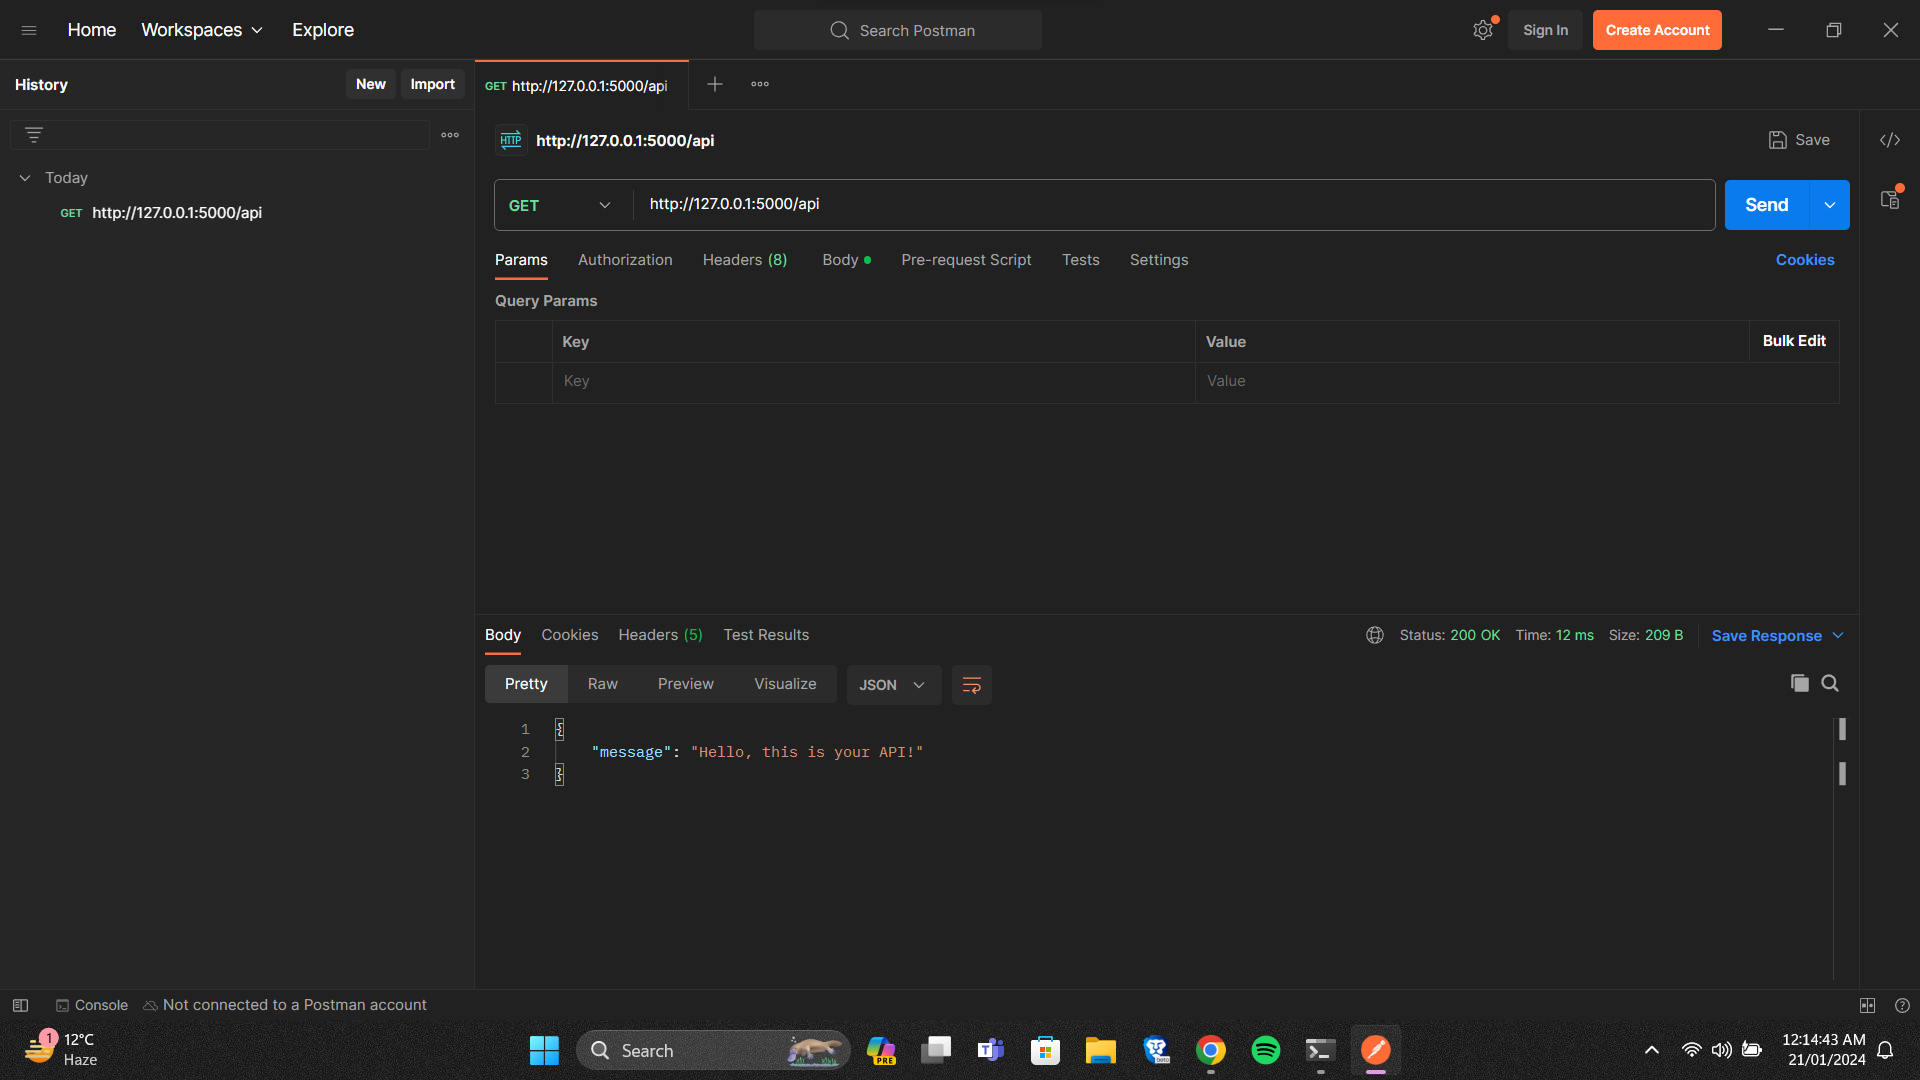

## POST 

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/api/greet', methods=['POST'])
def greet():
    data = request.get_json()
    name = data.get('name', 'Guest')
    return jsonify({'message': f'Hello, {name}!'})

if __name__ == '__main__':
    app.run(debug=True)

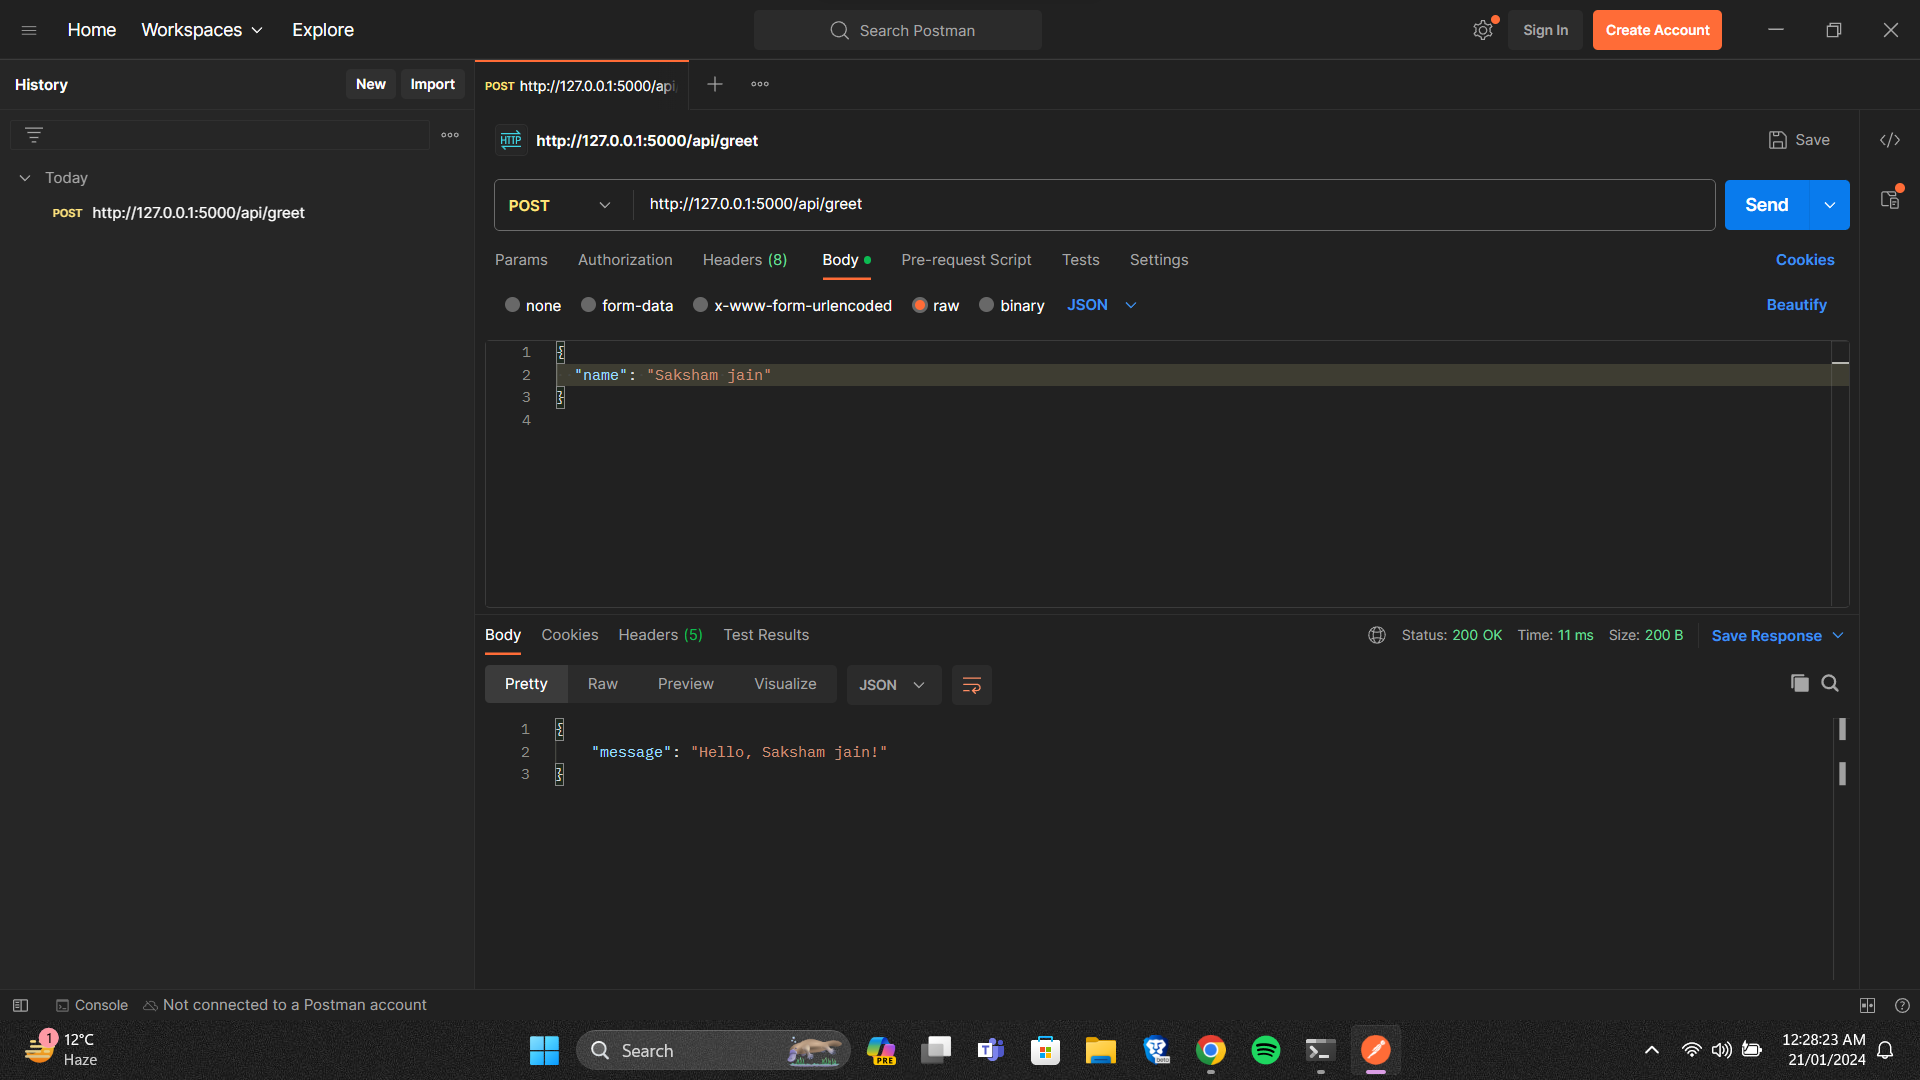